In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import os

In [71]:
training_stats_file = "train_stats_test.pkl"

plt.style.use('seaborn')
sns.set(style='whitegrid')


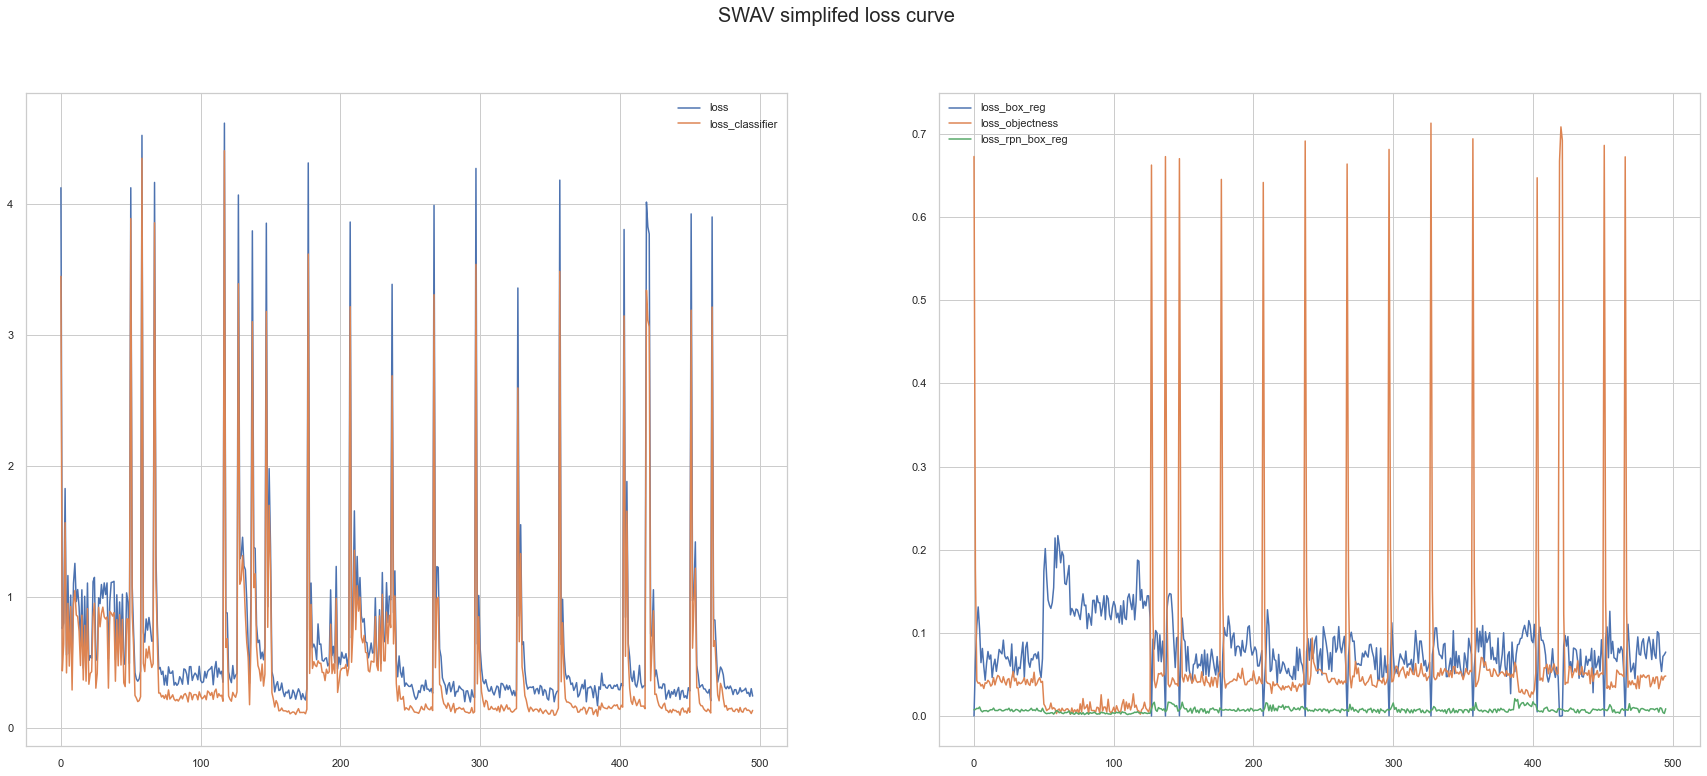

In [74]:
objects = []
with (open(os.path.join('./back_up', training_stats_file), "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30,12))
for n in objects[0].columns:
    if n == "Epoch":
        continue
    elif n == "loss" or n == "loss_classifier":
        objects[0].plot(y=n, ax=ax1, label=f'{n}')
    else:
        objects[0].plot(y=n, ax=ax2, label=f'{n}')

fig.suptitle('SWAV simplifed loss curve', fontsize=20)
plt.savefig('loss_curve.png')

In [53]:
objects[0]

,Epoch,loss,loss_classifier,loss_box_reg,loss_objectness,loss_rpn_box_reg
0,0.0050,4.126485,3.449643,0.000341,0.672450,0.007809
1,0.0050,0.758433,0.434733,0.065903,0.176500,0.008123
2,0.0050,0.800883,0.639683,0.108805,0.042759,0.009588
3,0.0005,1.828194,1.566910,0.131351,0.039708,0.009217
4,0.0005,0.556025,0.419325,0.104674,0.040209,0.011159
...,...,...,...,...,...,...
331,0.0050,0.453170,0.213832,0.082394,0.073171,0.008847
332,0.0050,0.396539,0.168785,0.096558,0.055727,0.015981
333,0.0050,0.414507,0.133916,0.113547,0.041783,0.014880
334,0.0050,3.381685,2.995901,0.285478,0.042001,0.007375


In [54]:
objects[0].drop(objects[0].tail(9).index,inplace=True)

In [56]:
objects[0].to_pickle("./back_up/train_stats.pkl")